In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

1. Import berfungsi sebagai mengambil library pada jupyter
2. Seaborn berfungsi untuk menampilkan visualisasi data, seperti menampilkan data asli dan data prediksi
3. math berfungsi untuk perhitungan data

In [2]:
data = pd.read_csv('R02_rice_field.csv')
data

,Production (X),Harvest Area (Y)
0,1329536.00,323589.00
1,1299699.00,329041.00
2,1382905.00,339253.00
3,1419128.00,348223.00
4,1368074.00,337561.00
...,...,...
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42


Mengambil data "R02_rice_field.csv" yang sudah ditaruh dalam 1 folder

In [3]:
data.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


Fungsinya untuk mengambil data teratas/5 data teratas

In [4]:
data.tail()

,Production (X),Harvest Area (Y)
219,3831923.00,390799.00
220,4090654.00,396559.00
221,2488641.91,511940.93
222,2164089.33,464103.42
223,2604913.29,545149.05


Fungsinya untuk mengambil data terbawah/5 data terbawah

In [5]:
print("Jumlah dataset yang dimiliki : "+str(len(data.index)))

Jumlah dataset yang dimiliki : 224


Untuk menghitung jumlah data yg diambil dalam dataset

In [6]:
data.describe()

,Production (X),Harvest Area (Y)
count,2.240000e+02,224.000000
mean,1.679701e+06,374349.966920
std,1.161387e+06,232751.161987
min,4.293800e+04,63142.040000
25%,5.488570e+05,146919.500000
50%,1.667773e+06,373551.500000
75%,2.436851e+06,514570.250000
max,4.881089e+06,872737.000000


Deskripsi data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Production (X)    224 non-null    float64
 1   Harvest Area (Y)  224 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


Memberikan info data berupa total kolom yang ada pada tabel sebelumnya

In [8]:
from sklearn.preprocessing import LabelEncoder
for col in ['Production (X)', 'Harvest Area (Y)']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['Production (X)'], data['Harvest Area (Y)'])

0       87
1       85
2       91
3       96
4       90
      ... 
219    216
220    218
221    171
222    157
223    175
Name: Production (X), Length: 224, dtype: int64 0      323589.00
1      329041.00
2      339253.00
3      348223.00
4      337561.00
         ...    
219    390799.00
220    396559.00
221    511940.93
222    464103.42
223    545149.05
Name: Harvest Area (Y), Length: 224, dtype: float64
0       87
1       85
2       91
3       96
4       90
      ... 
219    216
220    218
221    171
222    157
223    175
Name: Production (X), Length: 224, dtype: int64 0       96
1       97
2      103
3      104
4      101
      ... 
219    118
220    121
221    166
222    148
223    173
Name: Harvest Area (Y), Length: 224, dtype: int64


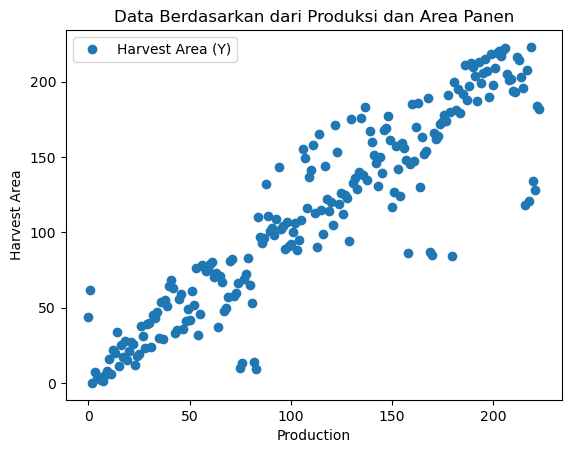

In [9]:
data.plot(x = 'Production (X)', y = 'Harvest Area (Y)', style = 'o')
plt.title('Data Berdasarkan dari Produksi dan Area Panen')
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.show()

1. data.plot berfungsi untuk menentukan titik x dan y yang akan ditampilkan nantinya
2. plt.title berfungsi untuk memberikan judul grafik
3. plt.xlabel berfungsi untuk memberikan nama pada titik x
4. plt.ylabel berfungsi untuk memberikan nama pada titik y
5. plt.show() untuk menampilkan grafik

In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Menentukan variabel x dan y

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

Memisahkan data menjadi 2, yaitu data untuk testing dan data yang akan dilatih

In [12]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Untuk mengimport library LinearRegression

In [13]:
print(regressor.intercept_)

10.506669551762386


Menentukan nilai potong

In [14]:
print(regressor.coef_)

[0.89933574]


Menentukan nilai koefisien

In [18]:
#intercept + coef * 3.3 Production
10.506669551762386 + 0.89933574 * 1382905.0

1243706.3981942518

Untuk menentukan nilai prediksi

In [19]:
y_pred = regressor.predict(x_test)

Mencari prediksi efektif

In [20]:
data = pd.DataFrame({'Data Asli' : y_test, 'Prediksi' : y_pred})
data

,Data Asli,Prediksi
0,43,40.184749
1,160,136.413673
2,16,19.500027
3,14,84.252200
4,33,49.178106
...,...,...
63,36,52.775449
64,126,122.923637
65,128,209.259869
66,125,124.722309


Menampilkan data prediksi

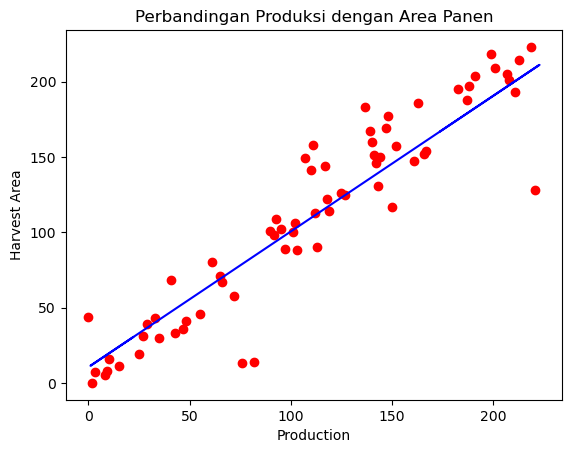

In [21]:
#Grafik dari hasil testing data
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Perbandingan Produksi dengan Area Panen')
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.show()

1. plt.Scatter untuk memanggil desain scatter
2. plt.plot berfungsi mengambil data prediksi
3. plt.title memberikan judul
4. plt.xlabel memberikan nama pada data x label
5. plt.ylabel memberikan nama pada data y label
6. plt.show() untuk menampilkan grafik

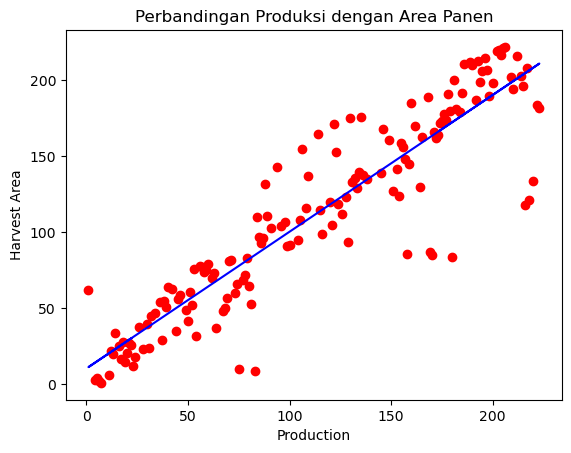

In [22]:
#Grafik dari pelatihan data
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Perbandingan Produksi dengan Area Panen')
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.show()

1. plt.Scatter untuk memanggil desain scatter
2. plt.plot berfungsi mengambil data prediksi
3. plt.title memberikan judul
4. plt.xlabel memberikan nama pada data x label
5. plt.ylabel memberikan nama pada data y label
6. plt.show() untuk menampilkan grafik